In [1]:
#Import MNIST dataset using sklearn (can do this for popular datasets)

from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

#You will get error because this data is corrupted. 
# See https://github.com/ageron/handson-ml/issues/143 for details about this error. 

#You will have to manually download the data from 
#https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat
#and place it into your scikit data home dir (/home/priyaroy/scikit_learn_data for me)

mnist

/home/priyaroy/machine_learning/env/lib/python3.5/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/home/priyaroy/machine_learning/env/lib/python3.5/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [2]:
type(mnist)

sklearn.utils.Bunch

In [3]:
featuresPixels=mnist["data"]
labels=mnist["target"]

print(featuresPixels.shape,labels.shape)


(70000, 784) (70000,)


In [4]:
#Select one row and view it. The 784 features correpond to each of 28X28 pixels. 
#Each pixel carries some color between white and black. 
#View the image in binary format (ie. only 2 colors: white or black)

import matplotlib
import matplotlib.pyplot as plt

#Select one row & arrange pixels in 28X28 format by reshaping featuresPixels
some_digit=featuresPixels[200,:]
some_image=featuresPixels[200,:].reshape(28,28)

#View image. Use the imshow function

plt.imshow(some_image, cmap=matplotlib.cm.binary)
plt.axis('off')
plt.show()

#It looks like a 0. Let's check what the corresponding label is

print("Corresponding label is:", int(labels[200]))




<Figure size 640x480 with 1 Axes>

Corresponding label is: 0


In [5]:
#Divide mnist data into training and test sets
#sklearn already divides it for us. First 60,000 are training and
#last 10,000 are test sets. 

x_train=featuresPixels[:60000]
y_train=labels[:60000]

x_test=featuresPixels[-10000:]
y_test=labels[-10000:]



In [6]:
#Shuffle the training dataset because giving similar labels in a row can lead to
#poor training.

import numpy as np
shuffle_index=np.random.permutation(60000)
print(shuffle_index[:10])

x_train, y_train=x_train[shuffle_index], y_train[shuffle_index]



[38227 29298 34072 34699 36468 42647 28111  9038 11126 56136]


In [7]:
#Train a binary classifier with Stochastic Gradient Descent (SGD) classifier

#Convert labels of training and test sets to boolean

y_train_5 = (y_train==5) #True if y_train = 5, False otherwise
y_test_5 = (y_test==5)

from sklearn.linear_model import SGDClassifier

sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train_5)

#Check on a test instance, say the 200th entry of the test sample
print("Is 200th image of the test sample predicted to be 5: ",sgd_clf.predict([x_test[200]]))

print("Is the 200th image's label = 5?:", y_test_5[200])

/home/priyaroy/machine_learning/env/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


Is 200th image of the test sample predicted to be 5:  [False]
Is the 200th image's label = 5?: False


In [8]:
from sklearn.model_selection import cross_val_score

score=cross_val_score(sgd_clf, x_train, y_train_5, scoring="accuracy", cv=5)



/home/priyaroy/machine_learning/env/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/priyaroy/machine_learning/env/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/priyaroy/machine_learning/env/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassi

In [9]:
score

array([0.96425298, 0.96458333, 0.95575   , 0.96308333, 0.9588299 ])

In [10]:
#Confusion matrix to evaluate your classifier
# matrix is 2X2: [TN, FP]
#                [FN, TP]
#Diagonal elements are true negative and true positive, off-diagonal 
# are for false

from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_5, cv=5)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)



/home/priyaroy/machine_learning/env/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/priyaroy/machine_learning/env/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/priyaroy/machine_learning/env/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassi

array([[53483,  1096],
       [ 1226,  4195]])

In [11]:
#Precision and Recall

#Precision = TP/(TP+FP): Maximizing precision means minimize misidentification of background as signal
#Recall = TP/(TP+FN): Maximizing recall means minimize loss of signal, at the cost of identifying 
#                     background as signal

from sklearn.metrics import precision_score, recall_score
print("Precision score of sgd classifier is:", precision_score(y_train_5, y_train_pred))
print("Recall score is:", recall_score(y_train_5, y_train_pred))


Precision score of sgd classifier is: 0.7928557928557929
Recall score is: 0.7738424644899465


In [12]:
#Precision and recall tradeoff
#Threshold, decision function

y_scores=sgd_clf.decision_function([featuresPixels[200,:]])
y_scores.shape

(1,)

/home/priyaroy/machine_learning/env/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/priyaroy/machine_learning/env/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/priyaroy/machine_learning/env/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassi

(59560,)
(59560,)
(59559,)


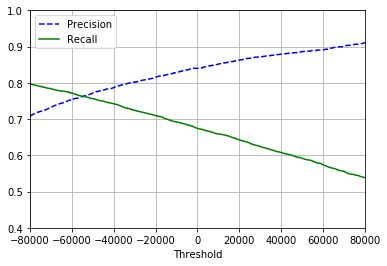

In [13]:
#Threshold to choose precision and recall

#First get decision scores of all instances (rows) in the training set

y_scores=cross_val_predict(sgd_clf, x_train, y_train_5, cv=3, method="decision_function")

from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

print(precisions.shape)
print(recalls.shape)
print(thresholds.shape)

#Thresholds has one less element, so read all elements of precisions
#and recalls except the last entry

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc=2)
    plt.ylim(0.4,1)
    plt.xlim(-80000, 80000)
    plt.grid()
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()


In [14]:
#Setting the threshold

#Suppose you want 95% precision, then from the graph we
#see that the corresponding threshold is 60,000

y_train_pred_prec95 = (y_scores >60000)

print("Precision when threshold is set to 60,000 is: ") 
print(np.around(precision_score(y_train_5, y_train_pred_prec95), decimals=3))

print("Corresponding recall is: ")
print(np.around(recall_score(y_train_5, y_train_pred_prec95), decimals=3))



Precision when threshold is set to 60,000 is: 
0.891
Corresponding recall is: 
0.574


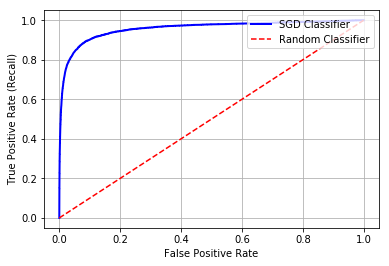

Area under the ROC curve, AUC =  0.96


In [15]:
#The Receiver Operating Charateristic (ROC) curve

#It is a plot of Recall (or sensitivity) verus False Positive Rate

from sklearn.metrics import roc_curve

fpr, tpr, thresholds =roc_curve(y_train_5, y_scores)
#Note: the order matters. The first returned array is the FPR, the 2nd is TPR.

def plot_roc_curve(fpr, tpr, label=None):
    #TPR and FPR for a random classifier
    x=np.linspace(0,1,10)
    y=x
    plt.plot(fpr, tpr, 'b-', linewidth=2, label=label)
    plt.plot(x,y,'r--', label="Random Classifier")
    plt.legend(loc=1)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.grid()
    
plot_roc_curve(fpr,tpr, "SGD Classifier")
plt.show()

#Find area under the curve (AUC) (A way to compare classifiers)

from sklearn.metrics import roc_auc_score

print("Area under the ROC curve, AUC = ", np.around(roc_auc_score(y_train_5, y_scores), decimals=2))

In [16]:
#Compare classifiers with ROC curves and AUC

#First train a RandomForest Classifier on your data

from sklearn.ensemble import RandomForestClassifier

forest_clf=RandomForestClassifier(random_state=42)

#RandomForest Clf does not have decision function. Use predict_proba instead. It 
#returns an np array
y_prob_forest = cross_val_predict(forest_clf, x_train, y_train_5, cv=3, method="predict_proba")



/home/priyaroy/machine_learning/env/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/priyaroy/machine_learning/env/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/priyaroy/machine_learning/env/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [17]:
#y_prob_forest.shape
print(y_prob_forest)

[[1.  0. ]
 [1.  0. ]
 [0.3 0.7]
 ...
 [1.  0. ]
 [0.9 0.1]
 [1.  0. ]]


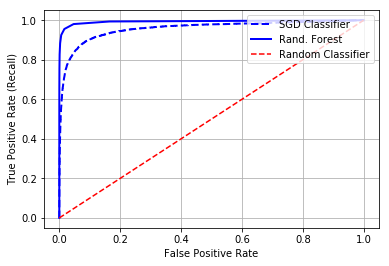

Area under the ROC curve, AUC =  0.99


In [18]:
y_scores_forest = y_prob_forest[:,1] #read prob that image is 5

fpr_f, tpr_f, thresholds_f =roc_curve(y_train_5, y_scores_forest)

plt.plot(fpr, tpr, 'b--', linewidth=2, label="SGD Classifier")
plot_roc_curve(fpr_f,tpr_f, "Rand. Forest")
plt.show()

print("Area under the ROC curve, AUC = ", np.around(roc_auc_score(y_train_5, y_scores_forest), decimals=2))

In [19]:
################################################
#Multiclass classification
################################################

#There are binary (e.g. SVM classifiers, sgd, linear classifiers) 
#and multiclass classifiers (e.g. Random Forest, Bayes). 

#Example of binary classifier. They fit multiclass data by
#performing one-versus-one or one-versus-all classification
#using multiple binary classifiers.The class of the classifier
#with highest score is chosen. 

sgd_clf.fit(x_train, y_train)
some_digit_score=sgd_clf.decision_function([some_digit])

/home/priyaroy/machine_learning/env/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [20]:
print("The scores for 'some_digit' to be 0 or 1 or...9 is: ",some_digit_score)

print("The index # corresponding to max. score is:", np.argmax(some_digit_score))

print("Class (or label) corresponding to this index # is:", sgd_clf.classes_[np.argmax(some_digit_score)])



The scores for 'some_digit' to be 0 or 1 or...9 is:  [[  300144.79041848  -679258.32292334  -276603.41076358  -420683.44862811
   -430181.50994591  -215777.67347907 -1002951.60026811  -280569.69802376
   -341468.05888627  -392722.19098836]]
The index # corresponding to max. score is: 0
Class (or label) corresponding to this index # is: 0.0


In [21]:
#Example of a multiclass classifier

forest_clf.fit(x_train, y_train)
print("The forest clf fit predicts that some_digit is:", forest_clf.predict([some_digit]))
forest_clf.predict_proba([some_digit])

/home/priyaroy/machine_learning/env/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The forest clf fit predicts that some_digit is: [0.]


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [22]:
#Evaluate accuracy of binary and multiclass classifiers using cross validation

#first check for binary clf
scores_sgd = cross_val_score(sgd_clf, x_train, y_train, cv=3, scoring="accuracy")
print("Mean accuracy score of sgd clf over 3 sets of cross validation: ", scores_sgd.mean())
print("Std. dev. : ", scores_sgd.std())

print("\n")

scores_forest = cross_val_score(forest_clf, x_train, y_train, cv=3, scoring="accuracy")
print("Mean accuracy score of forest clf over 3 sets of cross validation: ", scores_forest.mean())
print("Std. dev. : ", scores_forest.std())

/home/priyaroy/machine_learning/env/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/priyaroy/machine_learning/env/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/priyaroy/machine_learning/env/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassi

Mean accuracy score of sgd clf over 3 sets of cross validation:  0.8606683719273477
Std. dev. :  0.012874753279149024


Mean accuracy score of forest clf over 3 sets of cross validation:  0.9410166537265879
Std. dev. :  0.000332182071325712


In [23]:
#Improve fit quality by performing transformations
#Use standard scaler transformation to scale the intensity of each pixel

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float64))

scores_sgd_trans = cross_val_score(sgd_clf, x_train_scaled, y_train, cv=3, scoring="accuracy")
print("Mean accuracy score of sgd clf over 3 sets of cross validation, after standardisation: ", scores_sgd_trans.mean())
print("Std. dev. : ", scores_sgd_trans.std())

/home/priyaroy/machine_learning/env/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/priyaroy/machine_learning/env/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/priyaroy/machine_learning/env/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassi

Mean accuracy score of sgd clf over 3 sets of cross validation, after standardisation:  0.9103666238681747
Std. dev. :  0.0022968738112583557


In [24]:
type(x_train)

numpy.ndarray

In [35]:
x = np.array([1,2,3])

print(x.shape)

y=[5,6,7]
z = np.c_[x,y]

z

(3,)


array([[1, 5],
       [2, 6],
       [3, 7]])

In [28]:
#Multilabel classification

y_train_greaterthan7 = (y_train>7)
y_train_odd = (y_train%2==1)
y_multilabel = np.c_[y_train_greaterthan7, y_train_odd]

#Fit a multilabel classifier, like the nearest neighbor clf

from sklearn.neighbors import KNeighborsClassifier
nn_clf = KNeighborsClassifier()
nn_clf.fit(x_train, y_multilabel)
nn_clf.predict([some_digit])


array([[False, False]])